<a href="https://colab.research.google.com/github/Abdelsadeq/Deep-Learning-basics/blob/main/Intro_to_Deep_Learning/5_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [4]:
a

array([1, 3, 2, 4])

In [5]:
type(a)

numpy.ndarray

In [6]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [7]:
A[0]

array([3, 1, 2])

In [8]:
C[2, 0]

4

In [9]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [10]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [11]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [12]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [13]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [14]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [15]:
 A + B

ValueError: ignored

In [16]:
# A * B

### Dot product

In [17]:
A.shape

(2, 3)

In [18]:
B.shape

(3, 2)

In [19]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [20]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [21]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [22]:
C.shape

(6, 2)

In [23]:
A.shape

(2, 3)

In [24]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [27]:
# A.dot(C)

## Gradient descent

![](https://github.com/Abdelsadeq/Deep-Learning-basics/blob/main/data/banknotes.png?raw=1)

In [28]:
df = pd.read_csv('/content/banknotes.csv')

In [29]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [30]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [31]:
import seaborn as sns

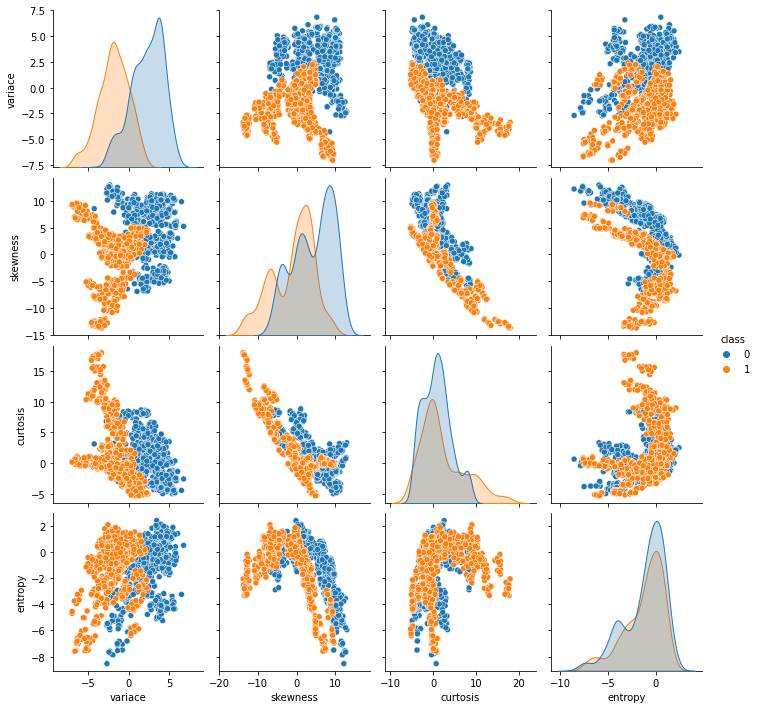

In [32]:
sns.pairplot(df, hue="class");

#### Baseline model

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [34]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [35]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99636364, 0.99270073, 0.99635036, 0.99635036])

### Logistic Regression Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [37]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [39]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
30/30 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.5458
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.5990
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.6531
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7281
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.8000
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8760
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.9292
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.9552
Epoch 9/10
30/30 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.9729
Epoch 10/10
30/30 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.9750


In [40]:
historydf = pd.DataFrame(history.history, index=history.epoch)

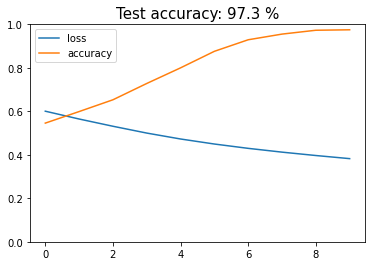

In [41]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [42]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(3, input_shape=(4,), activation='relu'))
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [43]:
historydf = pd.concat(dflist, axis=1)

In [44]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,0.794393,0.279167,0.561503,0.803125,0.622638,0.569792,0.355036,0.864583
1,0.748915,0.404167,0.406624,0.950000,0.441758,0.836458,0.089292,0.980208
2,0.722839,0.500000,0.303353,0.961458,0.322443,0.886458,0.053490,0.985417
3,0.705489,0.544792,0.235131,0.969792,0.221418,0.923958,0.039959,0.990625
4,0.691034,0.564583,0.190260,0.972917,0.137586,0.948958,0.031424,0.989583
5,0.678899,0.579167,0.159803,0.973958,0.083731,0.968750,0.027244,0.993750
6,0.668226,0.595833,0.138397,0.978125,0.063088,0.976042,0.022697,0.996875
7,0.659268,0.612500,0.122631,0.980208,0.053942,0.979167,0.019469,0.998958
8,0.650925,0.625000,0.110460,0.980208,0.048068,0.982292,0.017367,0.998958
9,0.642647,0.636458,0.100958,0.980208,0.044065,0.982292,0.015168,0.998958


In [45]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [46]:
historydf

learning_rate      0.01                0.05  ...      0.10      0.50          
metric             loss  accuracy      loss  ...  accuracy      loss  accuracy
0              0.794393  0.279167  0.561503  ...  0.569792  0.355036  0.864583
1              0.748915  0.404167  0.406624  ...  0.836458  0.089292  0.980208
2              0.722839  0.500000  0.303353  ...  0.886458  0.053490  0.985417
3              0.705489  0.544792  0.235131  ...  0.923958  0.039959  0.990625
4              0.691034  0.564583  0.190260  ...  0.948958  0.031424  0.989583
5              0.678899  0.579167  0.159803  ...  0.968750  0.027244  0.993750
6              0.668226  0.595833  0.138397  ...  0.976042  0.022697  0.996875
7              0.659268  0.612500  0.122631  ...  0.979167  0.019469  0.998958
8              0.650925  0.625000  0.110460  ...  0.982292  0.017367  0.998958
9              0.642647  0.636458  0.100958  ...  0.982292  0.015168  0.998958

[10 rows x 8 columns]

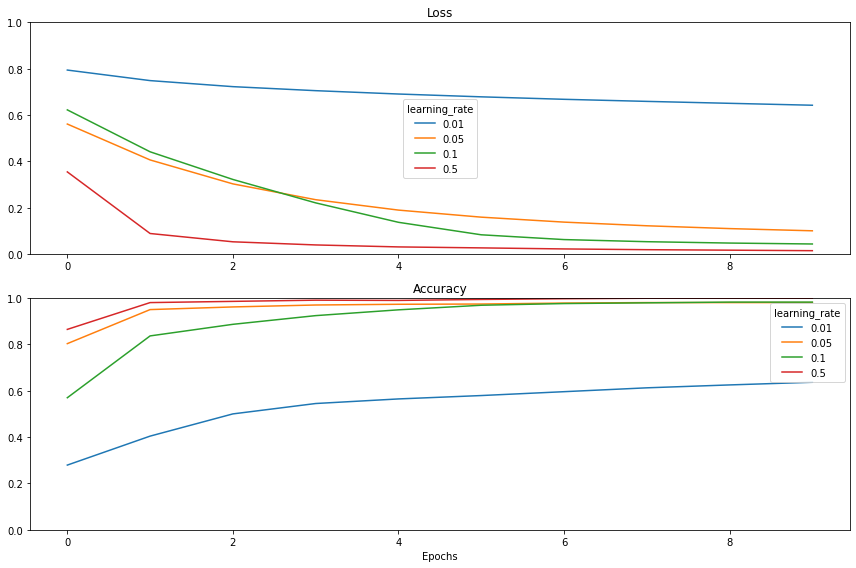

In [47]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [48]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(3, input_shape=(4,), activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=0.5),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=15, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [49]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [50]:
historydf

batch_size       16                  32   ...       64        128          
metric          loss  accuracy      loss  ...  accuracy      loss  accuracy
0           0.213672  0.919792  0.366702  ...  0.839583  0.712554  0.533333
1           0.054192  0.980208  0.138169  ...  0.918750  0.549253  0.672917
2           0.038217  0.987500  0.086946  ...  0.965625  0.452235  0.793750
3           0.031249  0.988542  0.066399  ...  0.981250  0.365839  0.845833
4           0.027685  0.989583  0.053854  ...  0.984375  0.272988  0.886458
5           0.025100  0.990625  0.046063  ...  0.984375  0.193026  0.936458
6           0.022650  0.992708  0.040466  ...  0.986458  0.135394  0.958333
7           0.023142  0.988542  0.035671  ...  0.990625  0.096946  0.965625
8           0.017691  0.991667  0.031685  ...  0.988542  0.074812  0.975000
9           0.019614  0.992708  0.029427  ...  0.989583  0.063374  0.979167
10          0.013136  0.997917  0.026723  ...  0.991667  0.056248  0.983333
11          0.010997  1.000000  0.024676  ...  0.991667  0.051417  0.984375
12          0.009918  1.000000  0.022742  ...  0.994792  0.047513  0.984375
13          0.008982  0.998958  0.020764  ...  0.992708  0.044685  0.983333
14          0.008395  1.000000  0.019637  ...  0.994792  0.043028  0.986458

[15 rows x 8 columns]

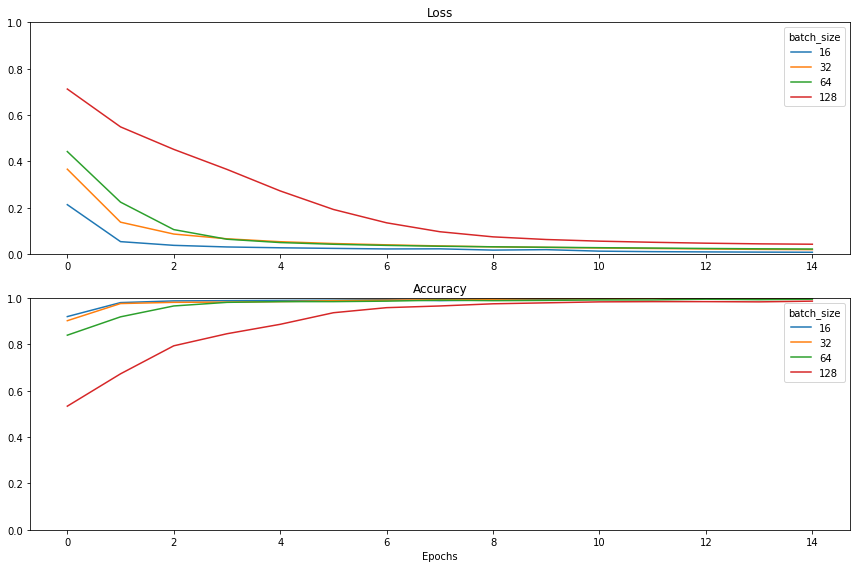

In [51]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [52]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [53]:
dflist = []

optimizers = ['SGD(learning_rate=0.5)',
              'SGD(learning_rate=0.5, momentum=0.3)',
              'SGD(learning_rate=0.5, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.5)',
              'Adagrad(learning_rate=0.5)',
              'RMSprop(learning_rate=0.5)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(3, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
   
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [54]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

In [55]:
historydf

optimizers SGD(learning_rate=0.5)  ... RMSprop(learning_rate=0.5)
metric                       loss  ...                   accuracy
0                        0.337732  ...                   0.934375
1                        0.089859  ...                   0.965625
2                        0.052013  ...                   0.972917
3                        0.037114  ...                   0.971875
4                        0.028348  ...                   0.963542
5                        0.023238  ...                   0.975000
6                        0.019442  ...                   0.978125
7                        0.016265  ...                   0.976042
8                        0.014504  ...                   0.981250
9                        0.012584  ...                   0.975000
10                       0.011526  ...                   0.982292
11                       0.010235  ...                   0.981250
12                       0.009559  ...                   0.986458
13                       0.008794  ...                   0.988542
14                       0.008166  ...                   0.982292
15                       0.007446  ...                   0.984375

[16 rows x 12 columns]

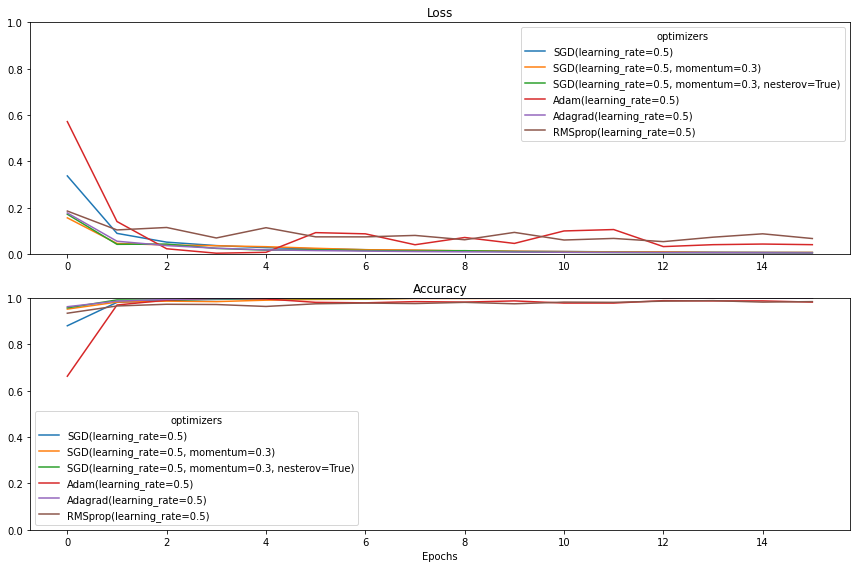

In [56]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [57]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(3, input_shape=(4,),kernel_initializer=init, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adagrad(learning_rate=0.5),
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [58]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

In [59]:
historydf

initializers     zeros             uniform  ... he_normal lecun_uniform          
metric            loss  accuracy      loss  ...  accuracy          loss  accuracy
0             0.691017  0.540625  0.121593  ...  0.941667      0.157115  0.944792
1             0.687500  0.555208  0.040144  ...  0.983333      0.040517  0.982292
2             0.688544  0.555208  0.034139  ...  0.989583      0.028271  0.988542
3             0.689016  0.555208  0.031553  ...  0.990625      0.017102  0.997917
4             0.688135  0.555208  0.030960  ...  0.993750      0.014443  0.998958
5             0.688148  0.555208  0.030321  ...  0.998958      0.009614  1.000000
6             0.688317  0.555208  0.024560  ...  1.000000      0.007951  1.000000
7             0.687221  0.555208  0.029663  ...  1.000000      0.006305  1.000000
8             0.687745  0.555208  0.023908  ...  0.998958      0.005388  1.000000
9             0.688553  0.555208  0.024040  ...  1.000000      0.004718  1.000000
10            0.687737  0.555208  0.026387  ...  1.000000      0.004162  1.000000
11            0.687684  0.555208  0.023384  ...  1.000000      0.003794  1.000000
12            0.688096  0.555208  0.023119  ...  1.000000      0.003439  1.000000
13            0.688383  0.555208  0.025270  ...  1.000000      0.003154  1.000000
14            0.687800  0.555208  0.022642  ...  1.000000      0.002858  1.000000
15            0.687813  0.555208  0.020656  ...  1.000000      0.002726  1.000000

[16 rows x 10 columns]

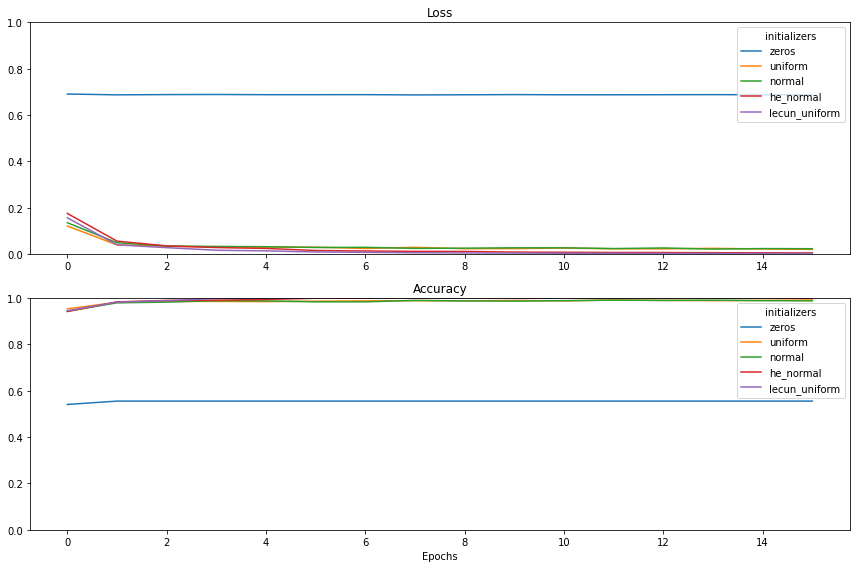

In [60]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [61]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20
42/42 [==============================] - 1s 5ms/step - loss: 0.7068 - accuracy: 0.5565 - val_loss: 0.6792 - val_accuracy: 0.5174
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7113 - val_loss: 0.4950 - val_accuracy: 0.8958
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.9107 - val_loss: 0.2835 - val_accuracy: 0.9444
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9435 - val_loss: 0.1539 - val_accuracy: 0.9583
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9554 - val_loss: 0.0873 - val_accuracy: 0.9757
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9688 - val_loss: 0.0573 - val_accuracy: 0.9826
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9762 - val_loss: 0.0448 - val_accuracy: 0.9826
Epoch 8/20
42/42 [==

In [62]:
result

[0.02909121662378311, 0.987864077091217]

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.layers

In [65]:
inp = model.layers[0].input
out = model.layers[0].output

In [66]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [67]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [68]:
features_function = K.function([inp], [out])

In [69]:
features_function

<function keras.backend.function.<locals>.func>

In [70]:
features_function([X_test])[0].shape

(412, 2)

In [71]:
features = features_function([X_test])[0]

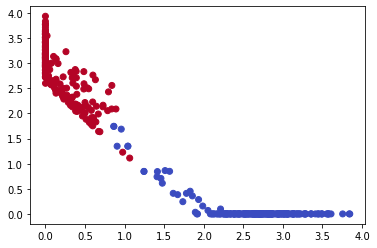

In [72]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [77]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

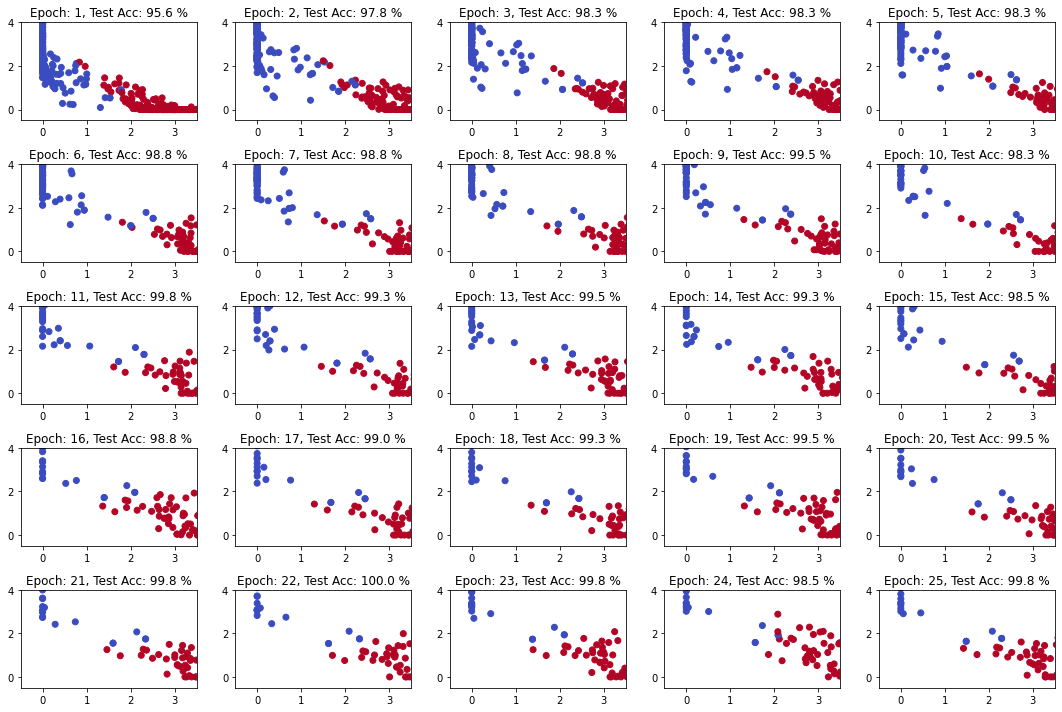

In [78]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard